<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/AI_in_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/MMAI/MMAI 831 - AI in Marketing/Dataset.xlsx'
df = pd.read_excel(url,sheet_name='Format')

In [4]:
df.head()

,User,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,...,20-6,20-7,20-8,20-9,20-10,20-11,20-12,20-13,20-14,20-15
0,U0001,1,2,-2,0,-1,0,-2,2,-1,...,1,1,1,1,1,1,1,1,1,1
1,U0002,2,0,2,-2,-1,-1,2,0,2,...,1,2,2,1,1,1,1,1,1,1
2,U0003,-1,2,0,2,0,2,-1,2,-1,...,1,1,1,1,1,1,1,1,4,1
3,U0004,1,1,-1,0,-1,0,-1,1,0,...,1,1,1,1,1,1,1,1,1,1
4,U0005,1,2,1,1,-1,0,0,2,0,...,1,1,1,1,1,1,1,1,3,1


In [5]:
# Create a DataFrame from the selected columns
df_B5 = pd.DataFrame(df, columns=['User', 'Q 1', 'Q 2', 'Q 3', 'Q 4', 'Q 5', 'Q 6', 'Q 7', 'Q 8', 'Q 9', 'Q 10'])

In [6]:
# Define the OCEAN dimensions and the questions associated with each dimension
df_B5['O'] = df_B5['Q 10'] + (df['Q 5']*-1)
df_B5['C'] = df_B5['Q 8'] + (df['Q 3']*-1)
df_B5['E'] = df_B5['Q 5'] + (df['Q 1']*-1)
df_B5['A'] = df_B5['Q 2'] + (df['Q 7']*-1)
df_B5['N'] = df_B5['Q 9'] + (df['Q 4']*-1)

In [7]:
df_B5.head()

,User,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,O,C,E,A,N
0,U0001,1,2,-2,0,-1,0,-2,2,-1,1,2,4,-2,4,-1
1,U0002,2,0,2,-2,-1,-1,2,0,2,1,2,-2,-3,-2,4
2,U0003,-1,2,0,2,0,2,-1,2,-1,2,2,2,1,3,-3
3,U0004,1,1,-1,0,-1,0,-1,1,0,1,2,2,-2,2,0
4,U0005,1,2,1,1,-1,0,0,2,0,2,3,1,-2,2,-1


In [8]:
# Create a DataFrame for OCEAN values
ocean_df = pd.DataFrame(df_B5, columns=['User', 'O', 'C', 'E', 'A', 'N'])

In [9]:
ocean_df.head()

,User,O,C,E,A,N
0,U0001,2,4,-2,4,-1
1,U0002,2,-2,-3,-2,4
2,U0003,2,2,1,3,-3
3,U0004,2,2,-2,2,0
4,U0005,3,1,-2,2,-1


In [10]:
ocean_df_cluster = pd.DataFrame(ocean_df, columns=['O', 'C', 'E', 'A', 'N'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

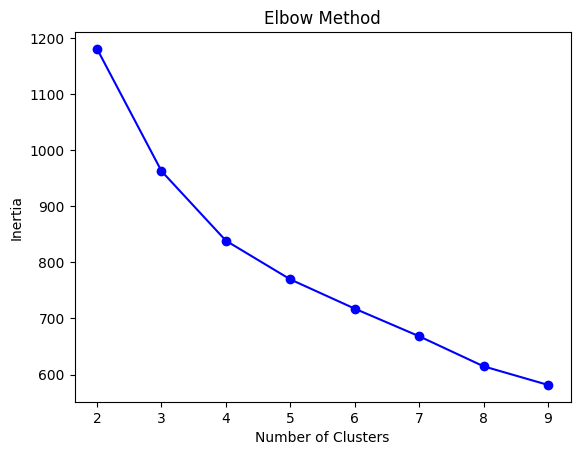

In [11]:
# Define a range of cluster numbers to evaluate
k_values = range(2, 10)

# Perform K-means clustering for each number of clusters
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ocean_df_cluster)
    inertias.append(kmeans.inertia_)

# Plot the inertia (within-cluster sum of squares) against the number of clusters
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [12]:
# Define a range of cluster numbers to evaluate
k_values = range(2, 10)

# Calculate the silhouette score for each number of clusters
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(ocean_df_cluster)
    score = silhouette_score(ocean_df_cluster, labels)
    silhouette_scores.append(score)

# Print the silhouette scores
for k, score in zip(k_values, silhouette_scores):
    print(f"Number of clusters: {k}, Silhouette Score: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 2, Silhouette Score: 0.24847969825887303
Number of clusters: 3, Silhouette Score: 0.2284273549219357
Number of clusters: 4, Silhouette Score: 0.21380903355503558
Number of clusters: 5, Silhouette Score: 0.1786235968832388
Number of clusters: 6, Silhouette Score: 0.16732717642310968
Number of clusters: 7, Silhouette Score: 0.17507398226270715
Number of clusters: 8, Silhouette Score: 0.1751408821658676
Number of clusters: 9, Silhouette Score: 0.18845535353624338


The silhouette score ranges from -1 to 1, where a higher score indicates better clustering results. Values close to 1 indicate well-separated clusters, values close to 0 indicate overlapping clusters, and negative values indicate that data points may have been assigned to the wrong clusters.

In [13]:
# Perform K-means clustering with 3 clusters
k = 3
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(ocean_df_cluster)

# Add the cluster labels to the DataFrame
ocean_df['Cluster'] = clusters

# Print the updated DataFrame
print(ocean_df)

      User  O  C  E  A  N  Cluster
0    U0001  2  4 -2  4 -1        0
1    U0002  2 -2 -3 -2  4        2
2    U0003  2  2  1  3 -3        0
3    U0004  2  2 -2  2  0        0
4    U0005  3  1 -2  2 -1        0
..     ... .. .. .. .. ..      ...
115  U0116  0  0 -2 -4  3        2
116  U0117 -1  4 -1  3 -2        0
117  U0118  1 -2 -1  1  0        1
118  U0119  2  2 -2  0  2        2
119  U0120  3  2  0  0 -3        0

[120 rows x 7 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# Calculate the average OCEAN values per cluster
avg_ocean_values = ocean_df.groupby('Cluster').mean()

print(avg_ocean_values)

                O         C         E         A         N
Cluster                                                  
0        2.076923  2.653846 -1.134615  1.846154 -1.403846
1        0.090909  0.363636  0.181818  0.393939 -0.393939
2        2.457143  0.514286 -2.200000  0.485714  2.028571


<ipython-input-14-dc8395885f77>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_ocean_values = ocean_df.groupby('Cluster').mean()


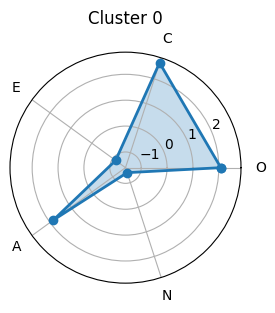

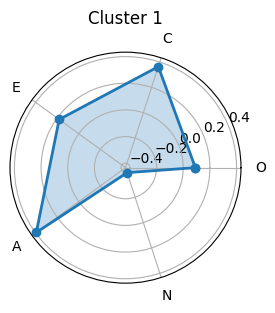

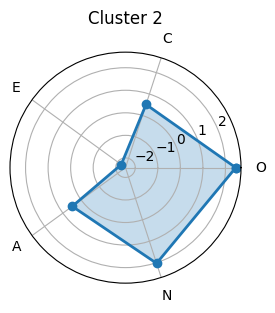

In [15]:
# Create a function to plot the spider diagram
def plot_spider_diagram(data, title):
    angles = np.linspace(0, 2 * np.pi, len(data.columns), endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))
    ax.plot(angles, data.values[0].tolist() + data.values[0][:1].tolist(), 'o-', linewidth=2)
    ax.fill(angles, data.values[0].tolist() + data.values[0][:1].tolist(), alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(data.columns)
    ax.set_title(title)
    ax.grid(True)
    plt.show()

# Plot the spider diagram for each cluster
for cluster in range(avg_ocean_values.shape[0]):
    data = avg_ocean_values.iloc[[cluster]]
    cluster_label = data.index[0]
    title = f"Cluster {cluster_label}"
    plot_spider_diagram(data, title)

In [22]:
# Merge datasets
merged_data = pd.merge(df, ocean_df, on='User')

# Print the merged dataset
print(merged_data)

      User  Q 1  Q 2  Q 3  Q 4  Q 5  Q 6  Q 7  Q 8  Q 9  ...  20-12 20-13  \
0    U0001    1    2   -2    0   -1    0   -2    2   -1  ...      1     1   
1    U0002    2    0    2   -2   -1   -1    2    0    2  ...      1     1   
2    U0003   -1    2    0    2    0    2   -1    2   -1  ...      1     1   
3    U0004    1    1   -1    0   -1    0   -1    1    0  ...      1     1   
4    U0005    1    2    1    1   -1    0    0    2    0  ...      1     1   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   ...   
115  U0116    1   -2    1   -1   -1   -1    2    1    2  ...      1     1   
116  U0117    1    2   -2    1    0   -1   -1    2   -1  ...      2     1   
117  U0118    1    1    2    1    0   -1    0    0    1  ...      1     1   
118  U0119    1    1   -1   -1   -1    1    1    1    1  ...      3     3   
119  U0120   -1    1   -1    2   -1    2    1    1   -1  ...      1     1   

    20-14 20-15  O  C  E  A  N Cluster  
0       1     1  2  4 -2  4 -1    

In [26]:
# Count the number of records that belong to the same "Cluster" and "Gender"
record_counts = merged_data.groupby(['Cluster', 'Gender']).size()
print(record_counts)

Cluster  Gender
0        F         32
         M         20
1        F         21
         M         12
2        F         24
         M         11
dtype: int64


In [27]:
# Calculate the percentage of each gender by cluster
gender_percentages = merged_data.groupby(['Cluster', 'Gender']).size() / merged_data.groupby('Cluster').size() * 100
print(gender_percentages)

Cluster  Gender
0        F         61.538462
         M         38.461538
1        F         63.636364
         M         36.363636
2        F         68.571429
         M         31.428571
dtype: float64


In [28]:
# Assign the result of previous step in a new column based on the Cluster number and the Gender
merged_data['Percentage'] = merged_data.apply(lambda row: gender_percentages.loc[row['Cluster'], row['Gender']], axis=1)
print(merged_data)

      User  Q 1  Q 2  Q 3  Q 4  Q 5  Q 6  Q 7  Q 8  Q 9  ...  20-13 20-14  \
0    U0001    1    2   -2    0   -1    0   -2    2   -1  ...      1     1   
1    U0002    2    0    2   -2   -1   -1    2    0    2  ...      1     1   
2    U0003   -1    2    0    2    0    2   -1    2   -1  ...      1     4   
3    U0004    1    1   -1    0   -1    0   -1    1    0  ...      1     1   
4    U0005    1    2    1    1   -1    0    0    2    0  ...      1     3   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   ...   
115  U0116    1   -2    1   -1   -1   -1    2    1    2  ...      1     1   
116  U0117    1    2   -2    1    0   -1   -1    2   -1  ...      1     2   
117  U0118    1    1    2    1    0   -1    0    0    1  ...      1     3   
118  U0119    1    1   -1   -1   -1    1    1    1    1  ...      3     3   
119  U0120   -1    1   -1    2   -1    2    1    1   -1  ...      1     1   

    20-15  O  C  E  A  N Cluster Percentage  
0       1  2  4 -2  4 -1     

In [30]:
# Group the merged dataset by 'Cluster'
grouped_data = merged_data.groupby('Cluster')

# Calculate the median age within each cluster
median_age_by_cluster = grouped_data['Age'].median()

median_age_by_cluster

Cluster
0    32.0
1    30.0
2    25.0
Name: Age, dtype: float64

In [33]:
# Group the merged dataset by 'Cluster' and 'Gender'
grouped_data = merged_data.groupby(['Cluster', 'Gender'])

# Calculate the median age within each cluster and gender group
median_age_by_cluster_gender = grouped_data['Age'].median().round(0)

median_age_by_cluster_gender

Cluster  Gender
0        F         32.0
         M         32.0
1        F         30.0
         M         29.0
2        F         26.0
         M         24.0
Name: Age, dtype: float64

**Cluster 0**
*   F - 61.5% - 32
*   M - 38.5% - 32

**Cluster 1**
*   F - 63.6% - 30
*   M - 36.4% - 29

**Cluster 2**
*   F - 68.6% - 26
*   M - 31.4% - 24

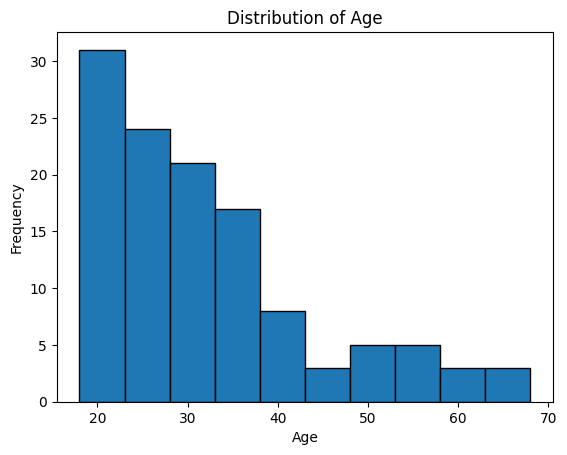

In [34]:
# Plotting the histogram for Age
plt.hist(df['Age'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Displaying the plot
plt.show()

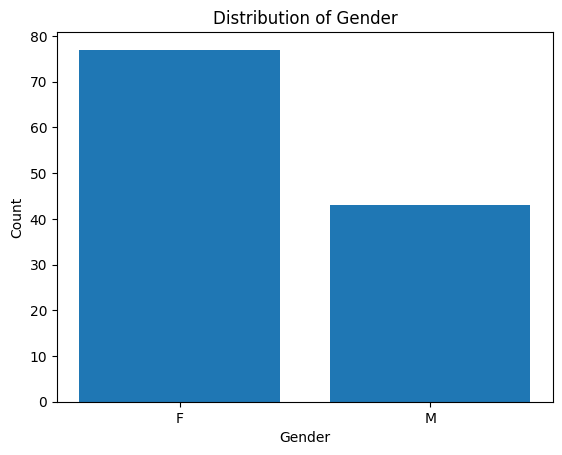

In [35]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Plotting the bar plot
plt.bar(gender_counts.index, gender_counts.values)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Displaying the plot
plt.show()

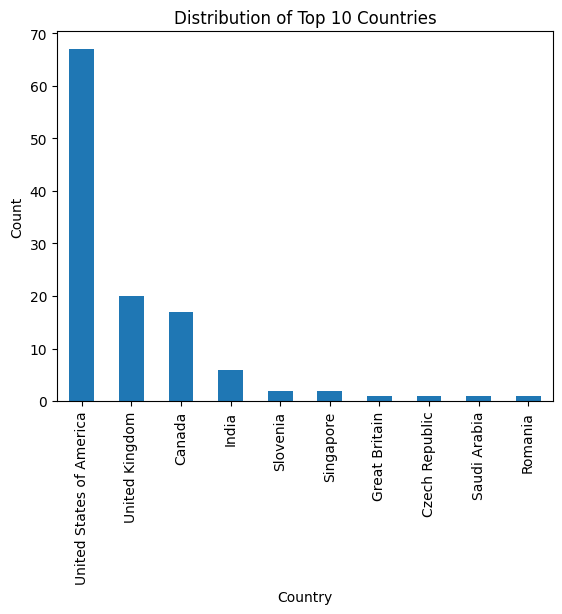

In [43]:
# Count the occurrences of each country
country_counts = df['Home country'].value_counts().head(10)

# Plotting the bar plot
country_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Top 10 Countries')

# Displaying the plot
plt.show()

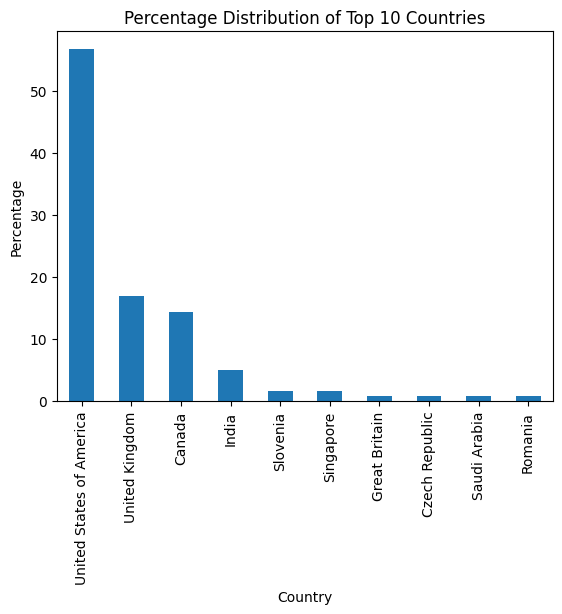

In [47]:
import matplotlib.pyplot as plt

# Assuming you have a dataset called 'data' with a column named 'Country'

# Count the occurrences of each country
country_counts = df['Home country'].value_counts().head(10)

# Calculate the total count of all countries
total_count = country_counts.sum()

# Calculate the percentage distribution
percentage_distribution = (country_counts / total_count) * 100

# Plotting the bar plot
percentage_distribution.plot(kind='bar')

# Adding percentage labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Top 10 Countries')

# Displaying the plot
plt.show()

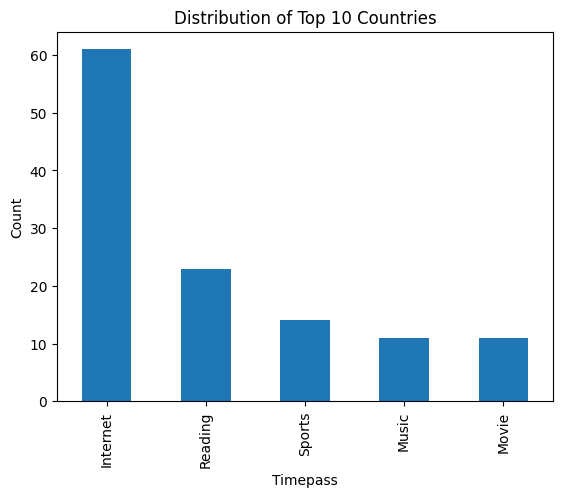

In [44]:
# Count the occurrences of timepass
timepass_counts = df['Timepass'].value_counts().head(10)

# Plotting the bar plot
timepass_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Timepass')
plt.ylabel('Count')
plt.title('Distribution of Top 10 Countries')

# Displaying the plot
plt.show()

In [67]:
cat1 = ["1-1","1-2","1-3","1-4","1-5","1-6","1-7","1-8","1-9","1-10","1-11","1-12","1-13","1-14","1-15"]
cat2= ["2-1","2-2","2-3","2-4","2-5","2-6","2-7","2-8","2-9","2-10","2-11","2-12","2-13","2-14","2-15"]
cat3= ["3-1","3-2","3-3","3-4","3-5","3-6","3-7","3-8","3-9","3-10","3-11","3-12","3-13","3-14","3-15"]
cat4= ["4-1","4-2","4-3","4-4","4-5","4-6","4-7","4-8","4-9","4-10","4-11","4-12","4-13","4-14","4-15"]
cat5= ["5-1","5-2","5-3","5-4","5-5","5-6","5-7","5-8","5-9","5-10","5-11","5-12","5-13","5-14","5-15"]
cat6= ["6-1","6-2","6-3","6-4","6-5","6-6","6-7","6-8","6-9","6-10","6-11","6-12","6-13","6-14","6-15"]
cat7= ["7-1","7-2","7-3","7-4","7-5","7-6","7-7","7-8","7-9","7-10","7-11","7-12","7-13","7-14","7-15"]
cat8= ["8-1","8-2","8-3","8-4","8-5","8-6","8-7","8-8","8-9","8-10","8-11","8-12","8-13","8-14","8-15"]
cat9= ["9-1","9-2","9-3","9-4","9-5","9-6","9-7","9-8","9-9","9-10","9-11","9-12","9-13","9-14","9-15"]
cat10= ["10-1","10-2","10-3","10-4","10-5","10-6","10-7","10-8","10-9","10-10","10-11","10-12","10-13","10-14","10-15"]
cat11= ["11-1","11-2","11-3","11-4","11-5","11-6","11-7","11-8","11-9","11-10","11-11","11-12","11-13","11-14","11-15"]
cat12= ["12-1","12-2","12-3","12-4","12-5","12-6","12-7","12-8","12-9","12-10","12-11","12-12","12-13","12-14","12-15"]
cat13= ["13-1","13-2","13-3","13-4","13-5","13-6","13-7","13-8","13-9","13-10","13-11","13-12","13-13","13-14","13-15"]
cat14= ["14-1","14-2","14-3","14-4","14-5","14-6","14-7","14-8","14-9","14-10","14-11","14-12","14-13","14-14","14-15"]
cat15= ["15-1","15-2","15-3","15-4","15-5","15-6","15-7","15-8","15-9","15-10","15-11","15-12","15-13","15-14","15-15"]
cat16= ["16-1","16-2","16-3","16-4","16-5","16-6","16-7","16-8","16-9","16-10","16-11","16-12","16-13","16-14","16-15"]
cat17= ["17-1","17-2","17-3","17-4","17-5","17-6","17-7","17-8","17-9","17-10","17-11","17-12","17-13","17-14","17-15"]
cat18= ["18-1","18-2","18-3","18-4","18-5","18-6","18-7","18-8","18-9","18-10","18-11","18-12","18-13","18-14","18-15"]
cat19= ["19-1","19-2","19-3","19-4","19-5","19-6","19-7","19-8","19-9","19-10","19-11","19-12","19-13","19-14","19-15"]
cat20= ["20-1","20-2","20-3","20-4","20-5","20-6","20-7","20-8","20-9","20-10","20-11","20-12","20-13","20-14","20-15"]





In [68]:
merged_data['med_cat1'] = merged_data[cat1].median(axis=1)
merged_data['med_cat2'] = merged_data[cat2].median(axis=1)
merged_data['med_cat3'] = merged_data[cat3].median(axis=1)
merged_data['med_cat4'] = merged_data[cat4].median(axis=1)
merged_data['med_cat5'] = merged_data[cat5].median(axis=1)
merged_data['med_cat6'] = merged_data[cat6].median(axis=1)
merged_data['med_cat7'] = merged_data[cat7].median(axis=1)
merged_data['med_cat8'] = merged_data[cat8].median(axis=1)
merged_data['med_cat9'] = merged_data[cat9].median(axis=1)
merged_data['med_cat10'] = merged_data[cat10].median(axis=1)
merged_data['med_cat11'] = merged_data[cat11].median(axis=1)
merged_data['med_cat12'] = merged_data[cat12].median(axis=1)
merged_data['med_cat13'] = merged_data[cat13].median(axis=1)
merged_data['med_cat14'] = merged_data[cat14].median(axis=1)
merged_data['med_cat15'] = merged_data[cat15].median(axis=1)
merged_data['med_cat16'] = merged_data[cat16].median(axis=1)
merged_data['med_cat17'] = merged_data[cat17].median(axis=1)
merged_data['med_cat18'] = merged_data[cat18].median(axis=1)
merged_data['med_cat19'] = merged_data[cat19].median(axis=1)
merged_data['med_cat20'] = merged_data[cat20].median(axis=1)



In [69]:
merged_data.head()

,User,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,...,med_cat11,med_cat12,med_cat13,med_cat14,med_cat15,med_cat16,med_cat17,med_cat18,med_cat19,med_cat20
0,U0001,1,2,-2,0,-1,0,-2,2,-1,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,U0002,2,0,2,-2,-1,-1,2,0,2,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,U0003,-1,2,0,2,0,2,-1,2,-1,...,4.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0
3,U0004,1,1,-1,0,-1,0,-1,1,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,U0005,1,2,1,1,-1,0,0,2,0,...,3.0,1.0,4.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0


In [79]:
categories = ['med_cat1', 'med_cat2', 'med_cat3','med_cat4', 'med_cat5', 'med_cat6','med_cat7', 'med_cat8', 'med_cat9','med_cat10', 'med_cat11', 'med_cat12','med_cat13', 'med_cat14', 'med_cat15','med_cat16', 'med_cat17', 'med_cat18','med_cat19', 'med_cat20']

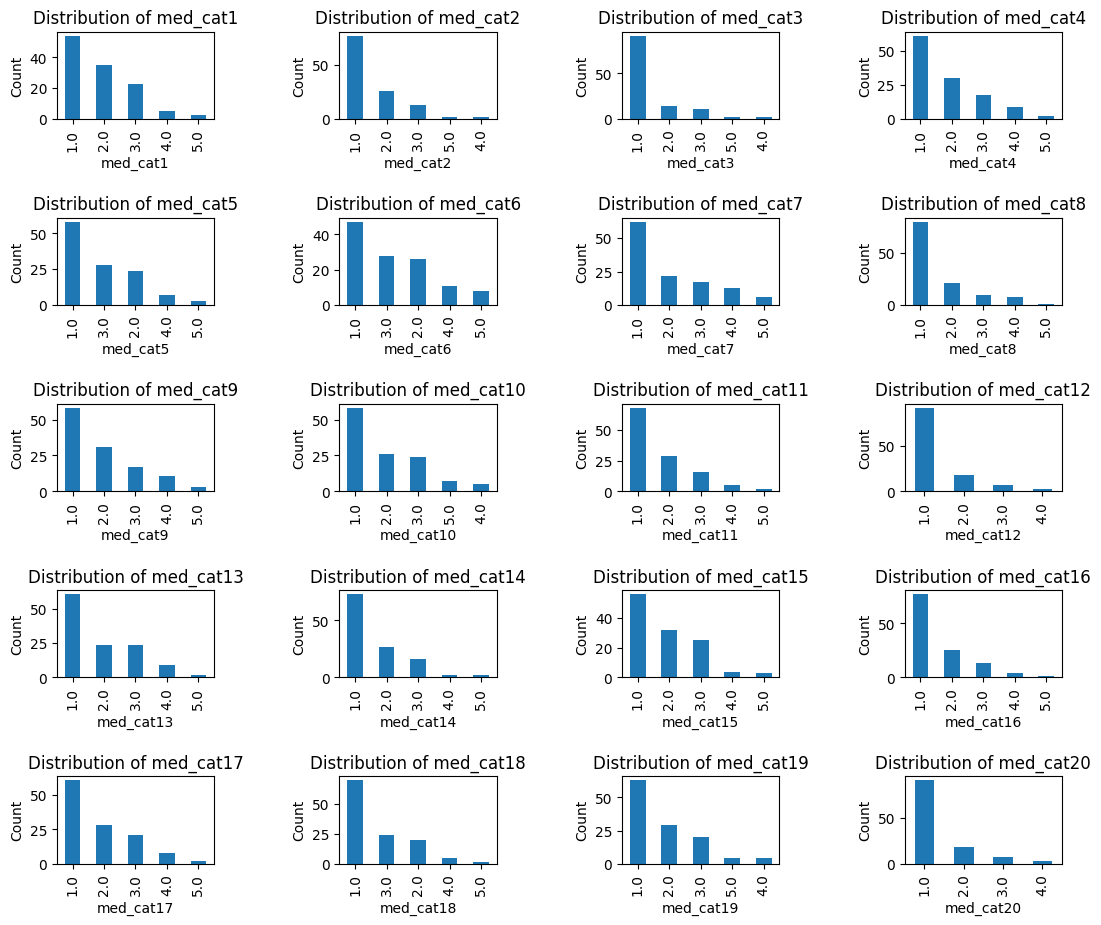

In [82]:
# Calculate the number of rows and columns for the subplot grid
num_rows = (len(categories) - 1) // 4 + 1
num_cols = min(len(categories), 4)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))
fig.tight_layout(pad=5.0)

# Iterate over the columns and create bar plots
for i, column in enumerate(categories):
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot axes
    counts = merged_data[column].value_counts()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {column}')

# Display the plot
plt.show()